# Nenana Ice Classic



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_26043/3504652586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfYear'][i]=31+28+31+df['Day'][i]
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_26043/3504652586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfYear'][i]=31+28+31+30+df['Day'][i]


Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev     
    ----------------- ----------------- -----------------
    6.339431053340477 123.4823808211487 7.259800615461252


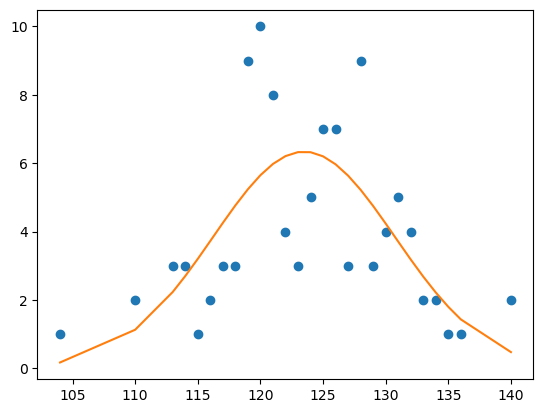

In [2]:
df = pd.read_csv("Nenana_Day.csv")
df['DayOfYear']=0

for i in range(len(df)):
    if (df['Month'][i]=='April'):
        df['DayOfYear'][i]=31+28+31+df['Day'][i]
    else:
        df['DayOfYear'][i]=31+28+31+30+df['Day'][i]
        
df = df[(df['Number'] > 0)]

x = df['DayOfYear']
y = df['Number']

plt.plot(x,y,'o')

from astropy import modeling
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(20,120,20)   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, y)

plt.plot(x, fitted_model(x))

print (fitted_model)
doy = int(fitted_model.mean.value)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev     
    ----------------- ------------------ -----------------
    9.612823118115655 13.786580630466672 4.907566230900545


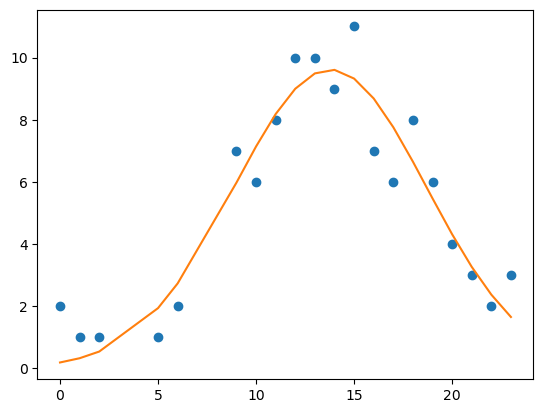

In [3]:
df = pd.read_csv("Nenana_Hour.csv")
        
df = df[(df['Number'] > 0)]

x = df['Hour']
y = df['Number']

plt.plot(x,y,'o')

from astropy import modeling
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(10,12,4)   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, y)

plt.plot(x, fitted_model(x))

print (fitted_model)
tof = fitted_model.mean.value

In [4]:
from datetime import datetime
year = "2024"
result = datetime.strptime(year + "-" + str(doy), "%Y-%j").strftime("%m-%d-%Y")

def get_duration(duration):
    hours = int(duration / 3600)
    minutes = int(duration % 3600 / 60)
    seconds = int((duration % 3600) % 60)
    return '{:02d}:{:02d}:{:02d}'.format(hours, minutes, seconds)

duration = tof*3600.0

print ("Best Guess: ",result,get_duration(duration))

Best Guess:  05-02-2024 13:47:11
